<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week07/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [39]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRbqc0ab1JYrjxi5bGxdOij16PW0E2e9Fv-q0OEx7p9H99oiZmcUxlCtQt7RDnJp0C4qb5NZDcmghNU/pub?output=csv'
df = pd.read_csv(url)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [40]:
# Explore the data
print('Duplicates:', df.duplicated().sum())
print('Missing Values:', df.isna().sum().sum())
print()
df.info()

Duplicates: 0
Missing Values: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float6

In [41]:
# Convert target to numeric values
df['diagnosis'].replace({'M': 1, 'B': 0}, inplace = True)

df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

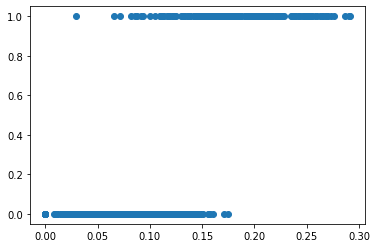

In [42]:
# Graph diagnosis vs. cocave points_worst
plt.scatter(df['concave points_worst'], df['diagnosis'])

In [49]:
# Set features and target
X = df[['concave points_worst']]
y = df['diagnosis']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

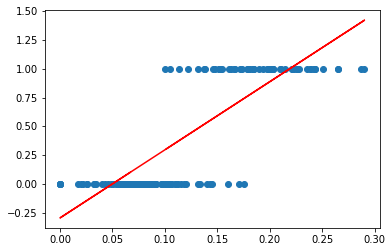

In [51]:
# Make a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_pred = lin_reg.predict(X_test)

# Graph the predictions
plt.scatter(X_test, y_test)
plt.plot(X_test, lin_pred, color = 'red')

In [53]:
# Construct a logisic regression model
log_reg = LogisticRegression(C = 1000)
scaler = StandardScaler()
log_reg_pipe = make_pipeline(scaler, log_reg)
log_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1000))])

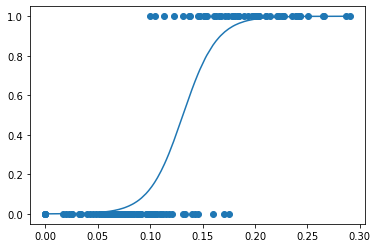

In [64]:
# A visualization of the logistic regression model
example_df = pd.DataFrame(data = {'worst_concave_points': X_test['concave points_worst'],
                                  'diagnosis': y_test})
example_df['logistic_preds'] = pd.DataFrame(log_reg_pipe.predict_proba(X_test)).loc[:, 1].values
example_df = example_df.sort_values(['logistic_preds'])

plt.scatter(X_test['concave points_worst'], y_test)
plt.plot(example_df['worst_concave_points'], example_df['logistic_preds'].values)